In [1]:
! pip install tifffile
! pip install scikit-image

     |████████████████████████████████| 148 kB 9.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/bin/python -m pip install --upgrade pip' command.


In [2]:
import tifffile as tiff
import os
import matplotlib.pyplot as plt
from skimage.io import imsave

In [3]:
import logging
import boto3
from botocore.exceptions import ClientError

S3_DATA_PATH = "data/"
TRAIN_TIFF = "train-volume.tif"
LABEL_TIFF = "train-labels.tif"
TEST_TIFF = "test-volume.tif"


def download_files(bucket):
    """Download tiff files from S3 bucket

    :param bucket: Bucket to download to
    :return: True if file was downloaded, else False
    """

    # Upload the file
    s3_client = boto3.client('s3')
    for file in [TRAIN_TIFF, LABEL_TIFF, TEST_TIFF]:
        if not os.path.exists(file):
            try:
                response = s3_client.download_file(bucket, S3_DATA_PATH + file, file)
            except ClientError as e:
                logging.error(e)
                return False
    
    return True

download_files("em-cells")

True

In [ ]:
!ls

Train shape : (30, 512, 512)
Label shape : (30, 512, 512)
Test shape : (30, 512, 512)


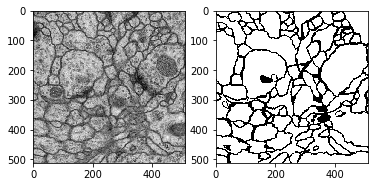

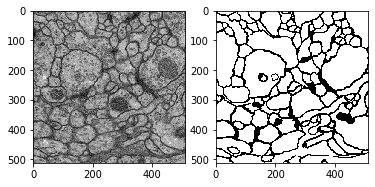

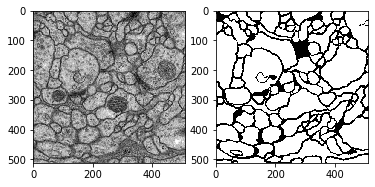

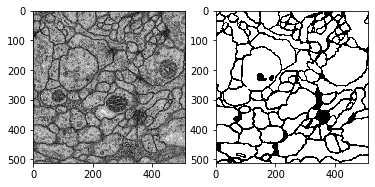

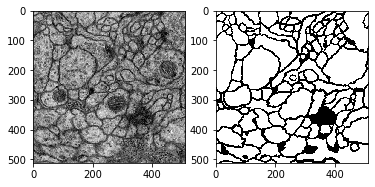

In [4]:
DATA_PATH = "data/"
TRAIN_PATH = DATA_PATH + "train/image/"
LABEL_PATH = DATA_PATH + "train/label/"
TEST_PATH = DATA_PATH + "test/image/"

def init_dataset(show = False):
    
    """Initialize dataset folders' architecture and convert tiff files to png

    :param show: Boolean enabling 5 first training samples plot
    """

    
    for path in [TRAIN_PATH,LABEL_PATH,TEST_PATH]:
        if not os.path.exists(path):
            os.makedirs(path)

    
    img_train = tiff.imread(TRAIN_TIFF)
    img_label = tiff.imread(LABEL_TIFF)
    img_test = tiff.imread(TEST_TIFF)

    print("Train shape : {}".format(img_train.shape))
    print("Label shape : {}".format(img_label.shape))
    print("Test shape : {}".format(img_test.shape))
    

    
    # Convert tiff training files to png
    for index, (img, mask) in enumerate(zip(img_train, img_label)):
        img_name = TRAIN_PATH + str(index) + ".png"
        mask_name = LABEL_PATH + str(index) + ".png"
        imsave(img_name, img)
        imsave(mask_name, mask)
        
        if show and index < 5:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(img, cmap='gray')
            ax[1].imshow(mask, cmap='gray')
            plt.show()
            
    # Convert tiff test file to png
    for index, img in enumerate(img_test):
        img_name = TEST_PATH + str(index) + ".png"
        imsave(img_name, img)
        
    
init_dataset(show = True)
            
